In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

import matplotlib.pyplot as plt
plt.ion()

Using Theano backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

#convert class vectors to binary class matrices
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [5]:
model = Sequential()

In [7]:
model.add(Dense(128, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
sgd=SGD()

In [9]:
%time model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

CPU times: user 12.8 ms, sys: 3.06 ms, total: 15.8 ms
Wall time: 18.4 ms


In [10]:
model.layers

In [11]:
h = model.fit(X_train, Y_train, batch_size =128, nb_epoch=3, show_accuracy = True, validation_data = (X_test, Y_test), verbose=1)

/Users/trishala/anaconda2/envs/newkeras/lib/python2.7/site-packages/keras/models.py:603: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 1s - loss: 0.5304 - acc: 0.8712 - val_loss: 0.2803 - val_acc: 0.9206
Epoch 2/3
60000/60000 [==============================] - 2s - loss: 0.2503 - acc: 0.9284 - val_loss: 0.2151 - val_acc: 0.9380
Epoch 3/3
60000/60000 [==============================] - 2s - loss: 0.1996 - acc: 0.9428 - val_loss: 0.1816 - val_acc: 0.9472


In [12]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 128)           100480      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 128)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            1290        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
Total params: 101770
______________________________________________________________________

In [13]:
#last layer = o/p

In [14]:
h.history

{'acc': [0.87116666663487752, 0.92836666663487755, 0.94278333330154418],
 'loss': [0.53039315087000527, 0.25026523978710175, 0.19962523740927379],
 'val_acc': [0.92059999999999997, 0.93799999999999994, 0.94720000000000004],
 'val_loss': [0.28027576651573183, 0.21510267090797425, 0.18161667157411576]}

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
score

[0.18161667207181453, 0.94720000000000004]

In [17]:
W1,b1,W2,b2 = model.get_weights()

In [18]:
W1

array([[ 0.06409263, -0.02690141,  0.0192059 , ...,  0.02506161,
         0.07760558, -0.07022051],
       [-0.02586389,  0.02279819,  0.00258304, ..., -0.03072857,
        -0.01162604,  0.0593618 ],
       [-0.03320667,  0.07656107,  0.04896343, ...,  0.00625649,
         0.01578979,  0.04167904],
       ..., 
       [ 0.01550994,  0.07038996, -0.06342642, ..., -0.07854355,
         0.06697856,  0.06121261],
       [-0.07215201, -0.07263801, -0.03878235, ...,  0.03814641,
         0.00351778, -0.01724334],
       [-0.00935296, -0.05248685,  0.04343547, ...,  0.07132783,
        -0.05778731, -0.02424622]], dtype=float32)

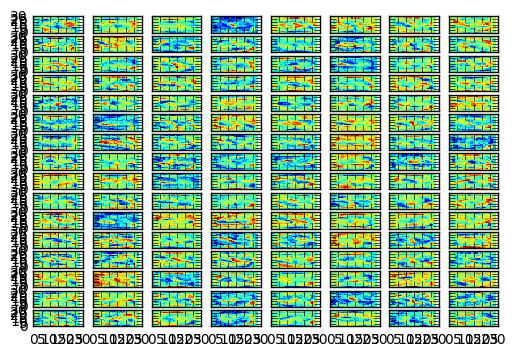

In [24]:
sx, sy = (16,8)
f, con = plt.subplots(sx, sy, sharex='col',sharey='row')
for xx in range(sx):
    for yy in range(sy):
        con[xx,yy].pcolormesh(W1[:,8*xx+yy].reshape(28,28))

In [20]:
W1.shape

(784, 128)

ValueError: total size of new array must be unchanged

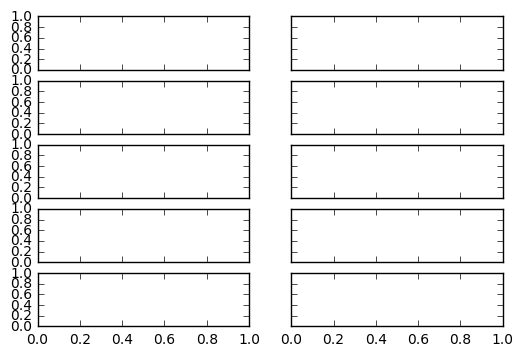

In [25]:
sx, sy = (5,2)
f, con = plt.subplots(sx, sy, sharex='col',sharey='row')
for xx in range(sx):
    for yy in range(sy):
        con[xx,yy].pcolormesh(W2[:,5*xx+yy].reshape(28,28))

In [27]:
from keras.utils.visualize_util import to_graph, plot
plot(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

RuntimeError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [28]:
import PIL

In [29]:
#He spent a lot of time with images. Didn't pay 100% attention becaise it looked useless


In [30]:
import io
sio = io.BytesIO() #pretending to save it to a file
sio.write(c)
sio.seek(0)
import matplotlib.image as mpimg
img = mpimg.imread(sio)

NameError: name 'c' is not defined

## Tut2

Custom (Advanced) activation function

In [1]:
import keras

Using Theano backend.


In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

In [3]:
from keras.layers.advanced_activations import LeakyReLU

In [4]:
from custom_activations import funky

In [5]:
model = Sequential()

In [6]:
act1 = LeakyReLU()

In [7]:
act2 = funky()

In [8]:
model.add(Dense(128, input_shape=(784,)))
#model.add(Activation(act1))
model.add(Dense(10))
model.add(Activation('softmax'))
sgd = SGD()

In [14]:
model.add(Activation(act2))

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
#print(X_train.shape[0], 'train samples')
#print(X_test.shape[0], 'test samples')

#convert class vectors to binary class matrices
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [20]:
%time model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

CPU times: user 10.8 ms, sys: 3.25 ms, total: 14.1 ms
Wall time: 11.7 ms


In [21]:
h = model.fit(X_train, Y_train, batch_size =128, nb_epoch=3, show_accuracy = True, validation_data = (X_test, Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 2s - loss: 0.0899 - acc: 0.9736 - val_loss: 0.1065 - val_acc: 0.9701
Epoch 2/3
60000/60000 [==============================] - 2s - loss: 0.0801 - acc: 0.9762 - val_loss: 0.0985 - val_acc: 0.9713
Epoch 3/3
60000/60000 [==============================] - 2s - loss: 0.0714 - acc: 0.9786 - val_loss: 0.0979 - val_acc: 0.9719


In [13]:
W1,b1,W2,b2 = model.get_weights()

In [15]:
W1

array([[ 0.0609796 , -0.08048708,  0.02518774, ..., -0.04858692,
        -0.0080365 , -0.01601848],
       [ 0.0058316 , -0.04499555, -0.07998239, ..., -0.05107684,
         0.00646198,  0.05760587],
       [ 0.08035327,  0.02934859, -0.06123387, ...,  0.00059357,
         0.03187834, -0.05843139],
       ..., 
       [-0.00977288, -0.03771346, -0.04096725, ...,  0.07804213,
         0.07983781, -0.01606785],
       [ 0.04412668,  0.00546097, -0.01240129, ...,  0.06646188,
        -0.02623947, -0.01892526],
       [-0.06146687, -0.04772973, -0.00192527, ..., -0.00696916,
         0.01904458,  0.02835527]], dtype=float32)

In [16]:
b1

array([ 0.10830657,  0.09372693, -0.10820419,  0.08001952,  0.06435121,
        0.15013966,  0.09597512,  0.06258541,  0.07342822, -0.05695296,
        0.09412847,  0.0127869 ,  0.06731253,  0.06168066, -0.04957343,
        0.10231892,  0.01240039,  0.07038262, -0.07463861,  0.08482115,
       -0.05662356, -0.02635376,  0.02927993,  0.11575627, -0.03069836,
       -0.01006541, -0.01405914, -0.02772627,  0.13302612,  0.07729293,
       -0.07765196,  0.06950395,  0.06446005, -0.0346903 ,  0.01739589,
       -0.01480151,  0.07178536,  0.09082165,  0.00086785,  0.18068744,
       -0.1374175 ,  0.03317665,  0.03322876, -0.05020482,  0.06607608,
       -0.02182441,  0.03403242,  0.00432062,  0.0386788 ,  0.05922405,
       -0.07869311, -0.01301461, -0.01124796, -0.07524113, -0.04126005,
       -0.09824981, -0.00596906, -0.00209784,  0.04278877, -0.06711022,
        0.01372007,  0.02348307,  0.0462534 ,  0.06585003,  0.03308071,
        0.0704101 , -0.00765254, -0.07249627,  0.07639988,  0.05

In [17]:
W2

array([[-0.37519106,  0.31323555, -0.1182779 , ...,  0.23506473,
        -0.17271386, -0.10104941],
       [-0.03488274, -0.14789627,  0.33578902, ..., -0.34892219,
        -0.35504439,  0.19734971],
       [-0.04322179,  0.04186574, -0.10021991, ..., -0.24777719,
         0.12526457,  0.00914418],
       ..., 
       [ 0.08674446, -0.15371946, -0.21930584, ...,  0.12782992,
        -0.38279939, -0.0053664 ],
       [ 0.23126894, -0.28280219,  0.21673177, ..., -0.2087817 ,
        -0.00289785, -0.39304143],
       [-0.15556516, -0.39747876, -0.17597052, ..., -0.41903621,
         0.27550212, -0.21559277]], dtype=float32)

In [18]:
b2

array([-0.08377069,  0.06161235,  0.03269513, -0.04629769,  0.06664782,
        0.06345445, -0.0446853 ,  0.05057413, -0.09236331, -0.0012812 ], dtype=float32)